In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Набор данных Iris состоит из 150 образцов трех видов ирисов: Iris setosa, Iris versicolor и Iris virginica. Каждый вид представлен 50 образцами.

Для каждого образца измеряются четыре характеристики (в см):

- Длина чашелистика (sepal length)
- Ширина чашелистика (sepal width)
- Длина лепестка (petal length)
- Ширина лепестка (petal width)

*Загрузка датасета*

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv(url, names=names)
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Коэффициент корреляции r-Пирсона является мерой прямолинейной связи между переменными: его значения достигают максимума, когда точки на графике двумерного рассеяния лежат на одной прямой линии. Коэффициент корреляции r - Пирсона оценивает только линейную связь переменных.

![Коэффициент корреляции](https://statanaliz.info/wp-content/uploads/2019/04/corr3.png)

*Матрица корреляций между признаками на всей таблице*

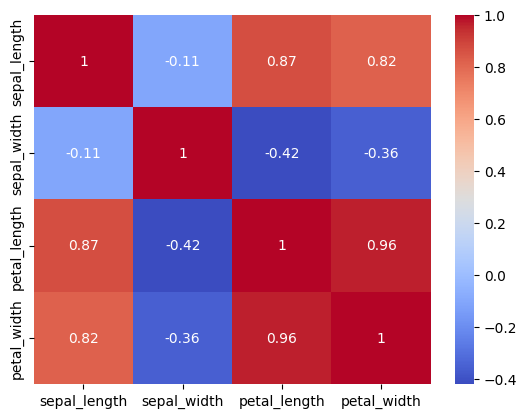

In [3]:
correlation = df.corr(method='pearson', numeric_only=True) # numeric_only - пропустить категориальные признаки
sns.heatmap(correlation, annot=True, cmap='coolwarm') # Тепловая карта
plt.show()

*Матрица корреляций отдельно по классам*

C:\Temp\ipykernel_21824\949882084.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.groupby('class').apply(lambda x: x.corr(method='pearson'))


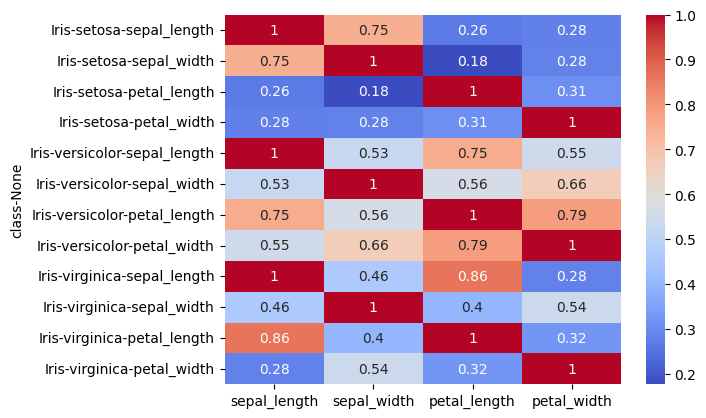

In [4]:
# Вычисляем корреляцию для каждого класса
correlation = df.groupby('class').apply(lambda x: x.corr(method='pearson'))

# Тепловая карта
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()


*Визуализация распределений классов на всех парах переменных*

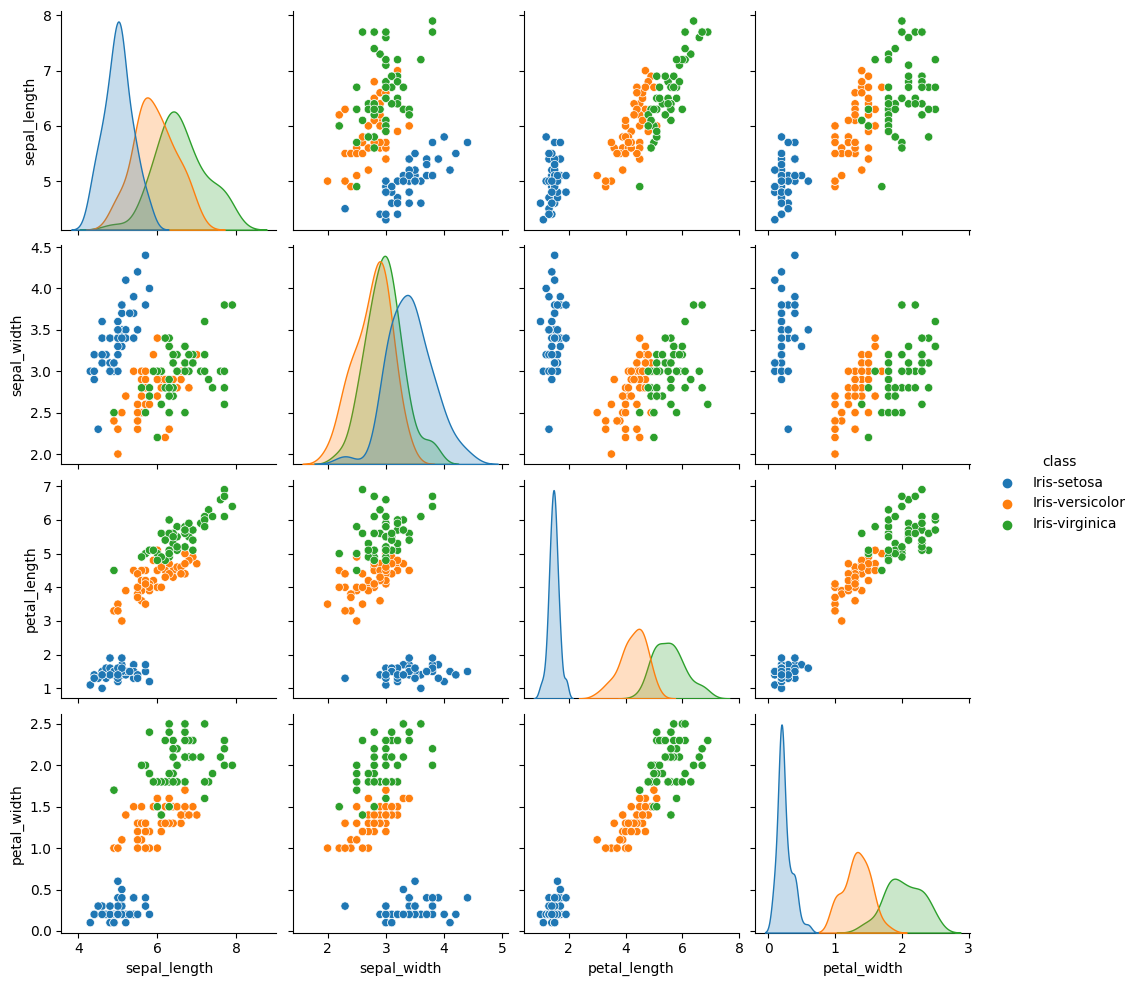

In [5]:
sns.pairplot(df, hue='class')


ЛДА работает, находя линейную комбинацию признаков, которая разделяет или описывает два или более классов объектов. Это делается путем максимизации отношения межклассовой дисперсии к внутриклассовой дисперсии в данных, что в результате приводит к оптимальному разделению классов.

![LDA vs PCA](https://sebastianraschka.com/images/blog/2014/linear-discriminant-analysis/lda_1.png)

#### *Оставим только 2 переменные: petal_length, petal_width. Попробуем разные модели*

In [6]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder


In [7]:
# Разделение датасета на 2 признака и целевую переменную
X = df[['petal_length', 'petal_width']].values
y = df['class']

# Создание экземпляра LabelEncoder (преобразует названия классов в порядковый номер)
le = LabelEncoder()

y = le.fit_transform(df['class'])

# Создание списка меток для классов
class_labels = df['class'].unique().tolist()


*Обучение моделей*

In [8]:
lda = LinearDiscriminantAnalysis().fit(X, y)
qda = QuadraticDiscriminantAnalysis().fit(X, y)
log_reg = LogisticRegression().fit(X, y)
svm_linear = SVC(kernel='linear').fit(X, y)
svm_rbf = SVC(kernel='rbf').fit(X, y)
models = zip([lda, qda, log_reg, svm_linear, svm_rbf], ['LDA', 'QDA', 'Logistic Regression', 'SVM Linear', 'SVM RBF'])


*Визуализация*

In [9]:
# Инициализация сетки для цветового выделения разделения
# Определение минимальных и максимальных значений для осей
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

# Определение шага сетки
step_size = .02

# Создание сетки
x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

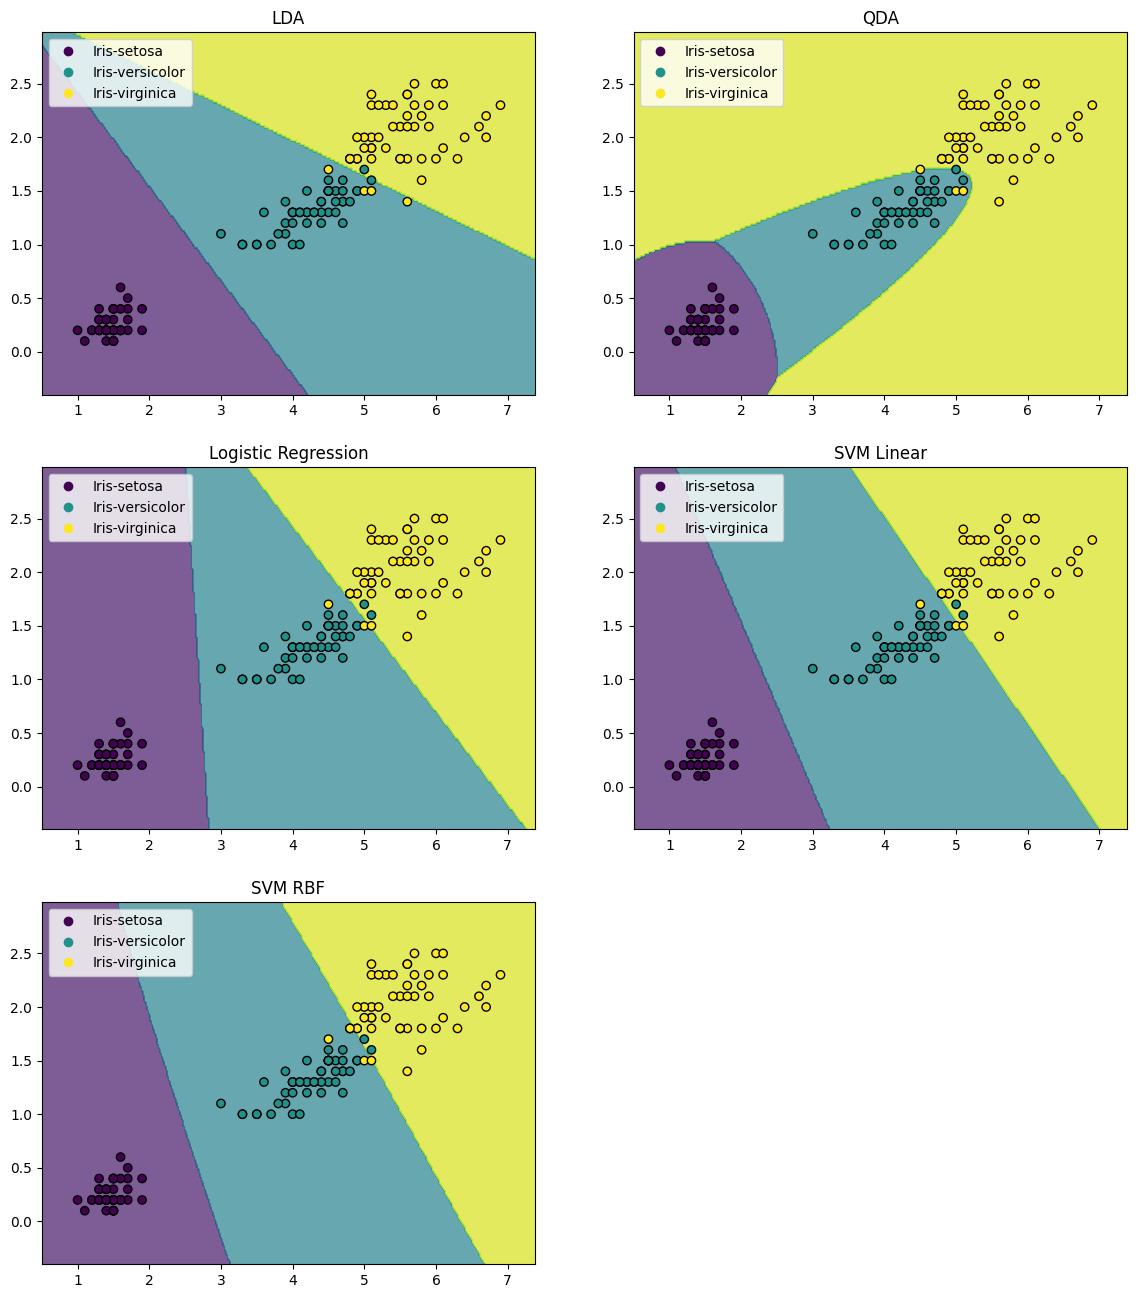

In [10]:
plt.figure(figsize=(14, 16))

# Проход по каждой модели
for index, (model, model_name) in enumerate(models):
    # Создание подграфика для каждой модели
    plt.subplot(3, 2, index + 1)
    
    # Предсказание модели для каждой точки сетки
    predicted_values = model.predict(np.c_[x_values.ravel(), y_values.ravel()])
    
    # Изменение формы предсказанных значений для соответствия форме сетки
    predicted_values = predicted_values.reshape(x_values.shape)
    
    # Построение контура и областей решений
    plt.contourf(x_values, y_values, predicted_values, alpha=.7)
    
    # Нанесение точек данных на график
    scatter_plot = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    
    # Название и легенда графика
    plt.title(model_name)
    plt.legend(handles=scatter_plot.legend_elements()[0], labels=class_labels)

# Отображение графика
plt.show()


#### *Линейный дискриминант на всех переменных*

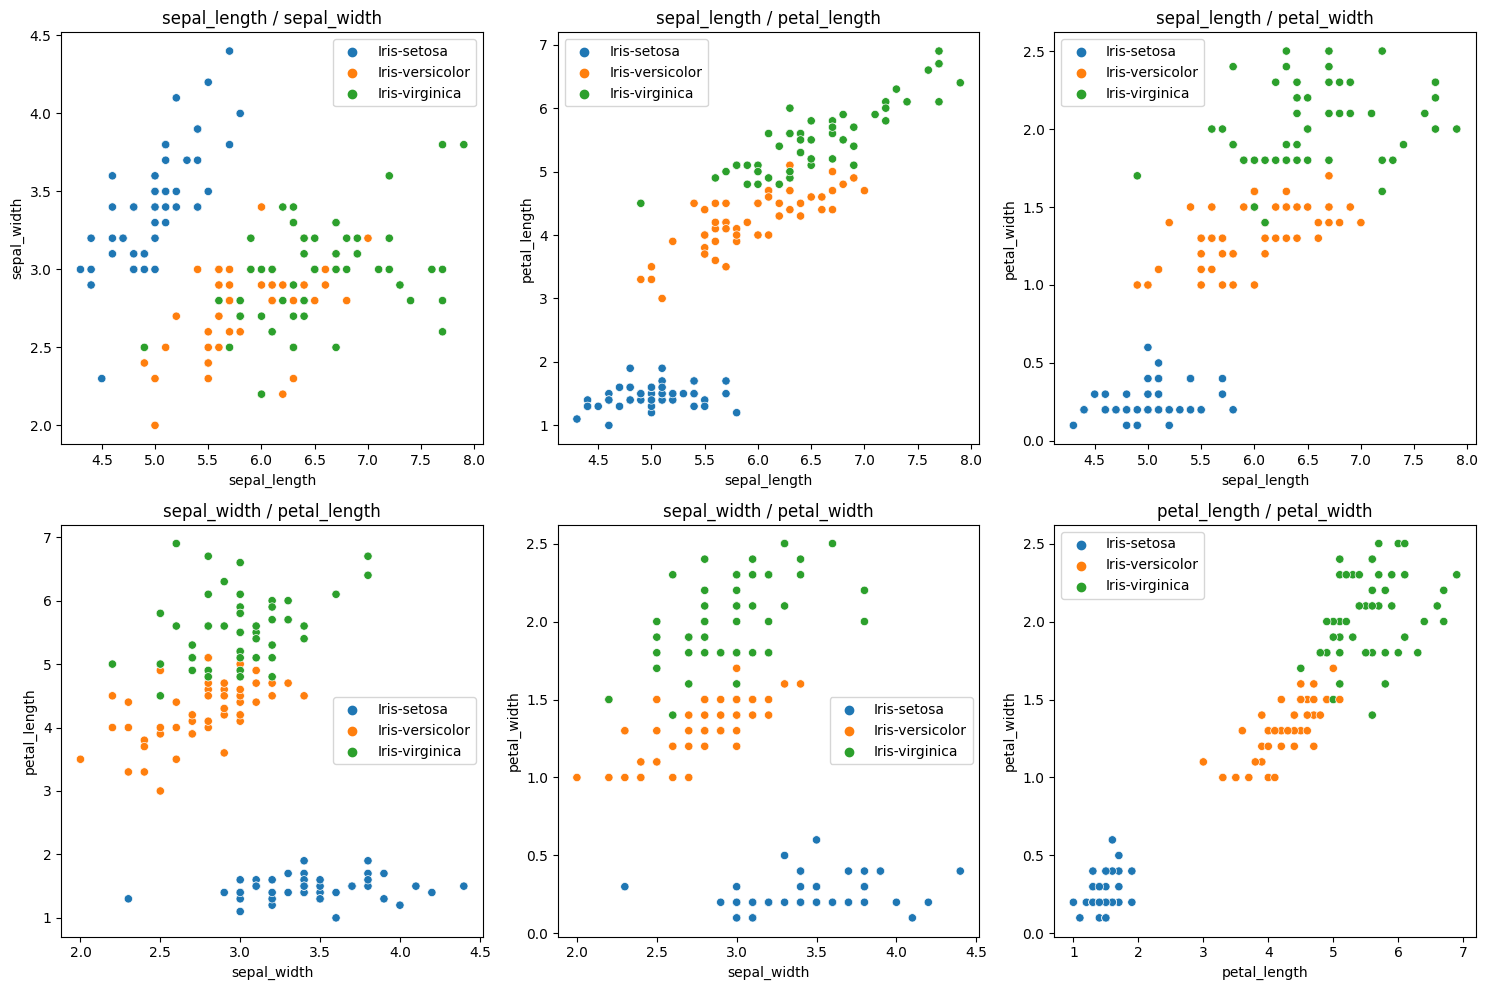

In [11]:
from itertools import combinations

X = df.drop('class', axis=1)
y = df['class']

# Создание модели
lda = LinearDiscriminantAnalysis().fit(X, y)

# Получение всех возможных комбинаций признаков
combs = list(combinations(range(X.shape[1]), 2))

# Добавление предсказаний модели в DataFrame
predict = lda.predict(X)

# Визуализация результатов
fig, subplots = plt.subplots(2, 3, figsize=(15, 10))

for subplot, (j, k) in zip(subplots.flat, combs):
    sns.scatterplot(data=df, x=df.columns[j], y=df.columns[k], hue=predict, ax=subplot)
    subplot.set_title(f'{df.columns[j]} / {df.columns[k]}')

plt.tight_layout()
plt.show()


Квадратичная разделяющая функция определяет расстояние от каждого объекта до центра каждого класса, учитывая форму и ориентацию класса. 

Формула:

$$\delta_k(x) = -\frac{1}{2} \log |\Sigma_k| - \frac{1}{2} (x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k) + \log \pi_k$$

где:
- $x$ - это вектор признаков объекта
- $\mu_k$ - это среднее значение признаков для класса $k$
- $\Sigma_k$ - это ковариационная матрица для класса $k$
- $|\Sigma_k|$ - определитель ковариационной матрицы
- $\pi_k$ - это априорная вероятность класса $k$

Первый член этой функции связан с формой класса, второй член связан с расстоянием от объекта до центра класса, а третий член связан с общим размером класса. Объект классифицируется как принадлежащий классу, для которого значение этой функции максимально.

#### *Реализуем собственный QDA*

In [12]:
# Функция для вычисления квадратичной разделяющей функции
def quadratic_discriminant(x, mean, cov, pi_k):
    return -0.5 * np.log(np.linalg.det(cov)) - 0.5 * (x - mean).T @ np.linalg.inv(cov) @ (x - mean) + np.log(pi_k)


*Статистический анализ датасета*

In [13]:
# Разделение датасета
X = df[['petal_length', 'petal_width']].values
y = df['class']

# Преобразование категориальных значений в числовые
y = le.fit_transform(df['class'].values)

# Вычисление средних значений и ковариационных матриц для каждого класса
means = []
covs = []
for i in np.unique(y):
    X_i = X[y == i]
    means.append(np.mean(X_i, axis=0))
    covs.append(np.cov(X_i.T))

# Априорные вероятности для данного датасета равны 1/3
priors = [1/3] * 3


*Визуализация*

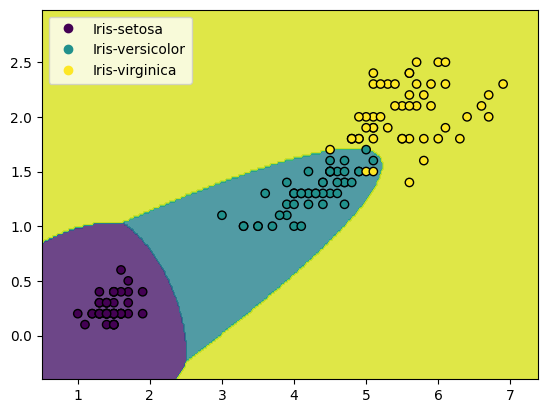

In [14]:
# Подготовка данных
xy = np.vstack([x_values.ravel(), y_values.ravel()]).T

# Вычисление квадратичной разделяющей функции для каждой точки на сетке
Z = np.apply_along_axis(lambda x: np.argmax([quadratic_discriminant(x, mean, cov, pi_k) for mean, cov, pi_k in zip(means, covs, priors)]), 1, xy)
Z = Z.reshape(x_values.shape)

# Отображение границ решений
plt.contourf(x_values, y_values, Z, alpha=0.8)

# Отображение данных
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')

# Добавление легенды
plt.legend(handles=scatter.legend_elements()[0], labels=class_labels)
plt.show()


*Ещё раз выведем решение QDA из библиотеки Sklearn и убедимся, что решения идентичны*

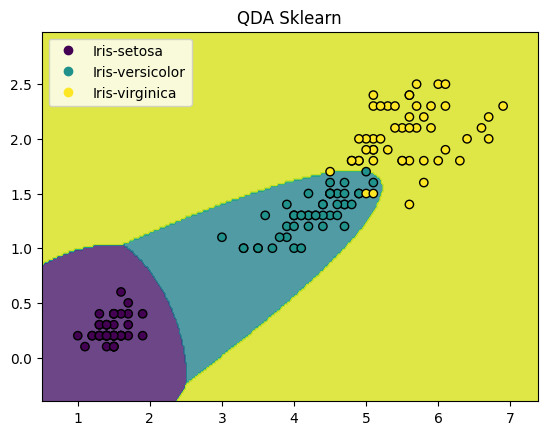

In [15]:
Z = qda.predict(np.c_[x_values.ravel(), y_values.ravel()])

# Построение контура и областей решений
Z = Z.reshape(x_values.shape)
plt.contourf(x_values, y_values, Z, alpha=.8)

# Нанесение точек данных на график
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title('QDA Sklearn')

# Добавление легенды
plt.legend(handles=scatter.legend_elements()[0], labels=class_labels)